In [1]:
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt
import scipy.integrate
import time
%matplotlib notebook 
# For plotting. Don't include this if you submit
                     # a Jupyter Notebook to Gradescope.

## Data matrices
In the activity on Wednesday we explored how matrices can be used to store different pieces of information. I'll introduce another one right now. We will use this data matrix frequently next week when we develop and employ a *movie recommendation algorithm* based on your movie ratings.

I will be posting a survey on Canvas on Wednesday. If you complete it by Monday next week **you will get 5 points of extra credit for this class.** In order to get the extra credit, your responses need to be serious and follow the instructions! Submitting the survey with no information provided will not earn the extra credit.

As an example of what we will have, is a list of movies and the score (out of 5) for each movie people have seen. For instance, if the 4 movies we are ranking are *The Batman*, *Shrek*, *Spider-Man: No Way Home*, and *Pulp Fiction*, each person will have a score for those movies. For example, a student in the class *Adnan* may provide the following rankings:
$$ \text{Adnan} = [3, 4, 2, 1] $$
meaning that they rank The Batman 3, Shrek 4, etc. Suppose we also have the results for 4 more students:
$$ 
\begin{align*}
\text{Bing} &= [5, 1, 3, 1]\\
\text{Catherine} &= [1, 1, 2, 4]\\
\text{Ding} &= [3, 3, 3, 3]\\
\text{Eric} &= [2, 1, 4, 4]
\end{align*}
$$
We can put all 5 pieces of information into a matrix of shape $5 \times 4$. Each row will represent the scores for the 4 movies for each person:
$$
A = \begin{pmatrix}
3 & 4 & 2 & 1 \\
5 & 1 & 3 & 1\\
1 & 1 & 2 & 4\\
3 & 3 & 3 & 3\\
2 & 1 & 4 & 4
\end{pmatrix}.
$$
This data matrix will be the beginning of our *movie-recommendation algorithm.*

## Matrices as an *operator* or *linear map*

We have seen that we can multiply vectors by matrices. We've also seen that this represents a function, e.g., $w'(t) = Aw(t) = f(w(t))$ in the ODE example above. 

Matrices represent *to linear transformations*, meaning that they have a nice geometrical interpretation.
In particular, matrix-multiplication of a vector acts by stretching and rotating that vector. Here
is the diagram (the top half at least, we will get to the bottom half later).
<div>
<img src="SVD_diagram.png" alt="Matrices as a linear transformation" style="width: 200px;"/>
</div>
We have two vectors: the hands of a clock, that represent the semimajor and seminor axes of an
ellipse (in this case it is a circle, so they are equal). These are the red and yellow vectors. When we
apply $M$ to the vectors (by multiplying), one at a time, they stretch and rotate (importantly, they don't move around,
or translate, through space).

Let's see this for ourselves. We know how to plot vectors using `quiver`. We will use the vectors
$$  \vec{e_1} = \begin{pmatrix} 1\\ 0 \end{pmatrix}, \qquad \text{ and } \qquad \vec{e_2} = \begin{pmatrix} 0 \\ 1 \end{pmatrix},
$$
(the two basis vectors for $\mathbb{R}^2$!), and the matrix
$$ A = \begin{pmatrix} 1 & 2 \\ 0.3 & 0.4 \end{pmatrix}.$$

<IPython.core.display.Javascript object>


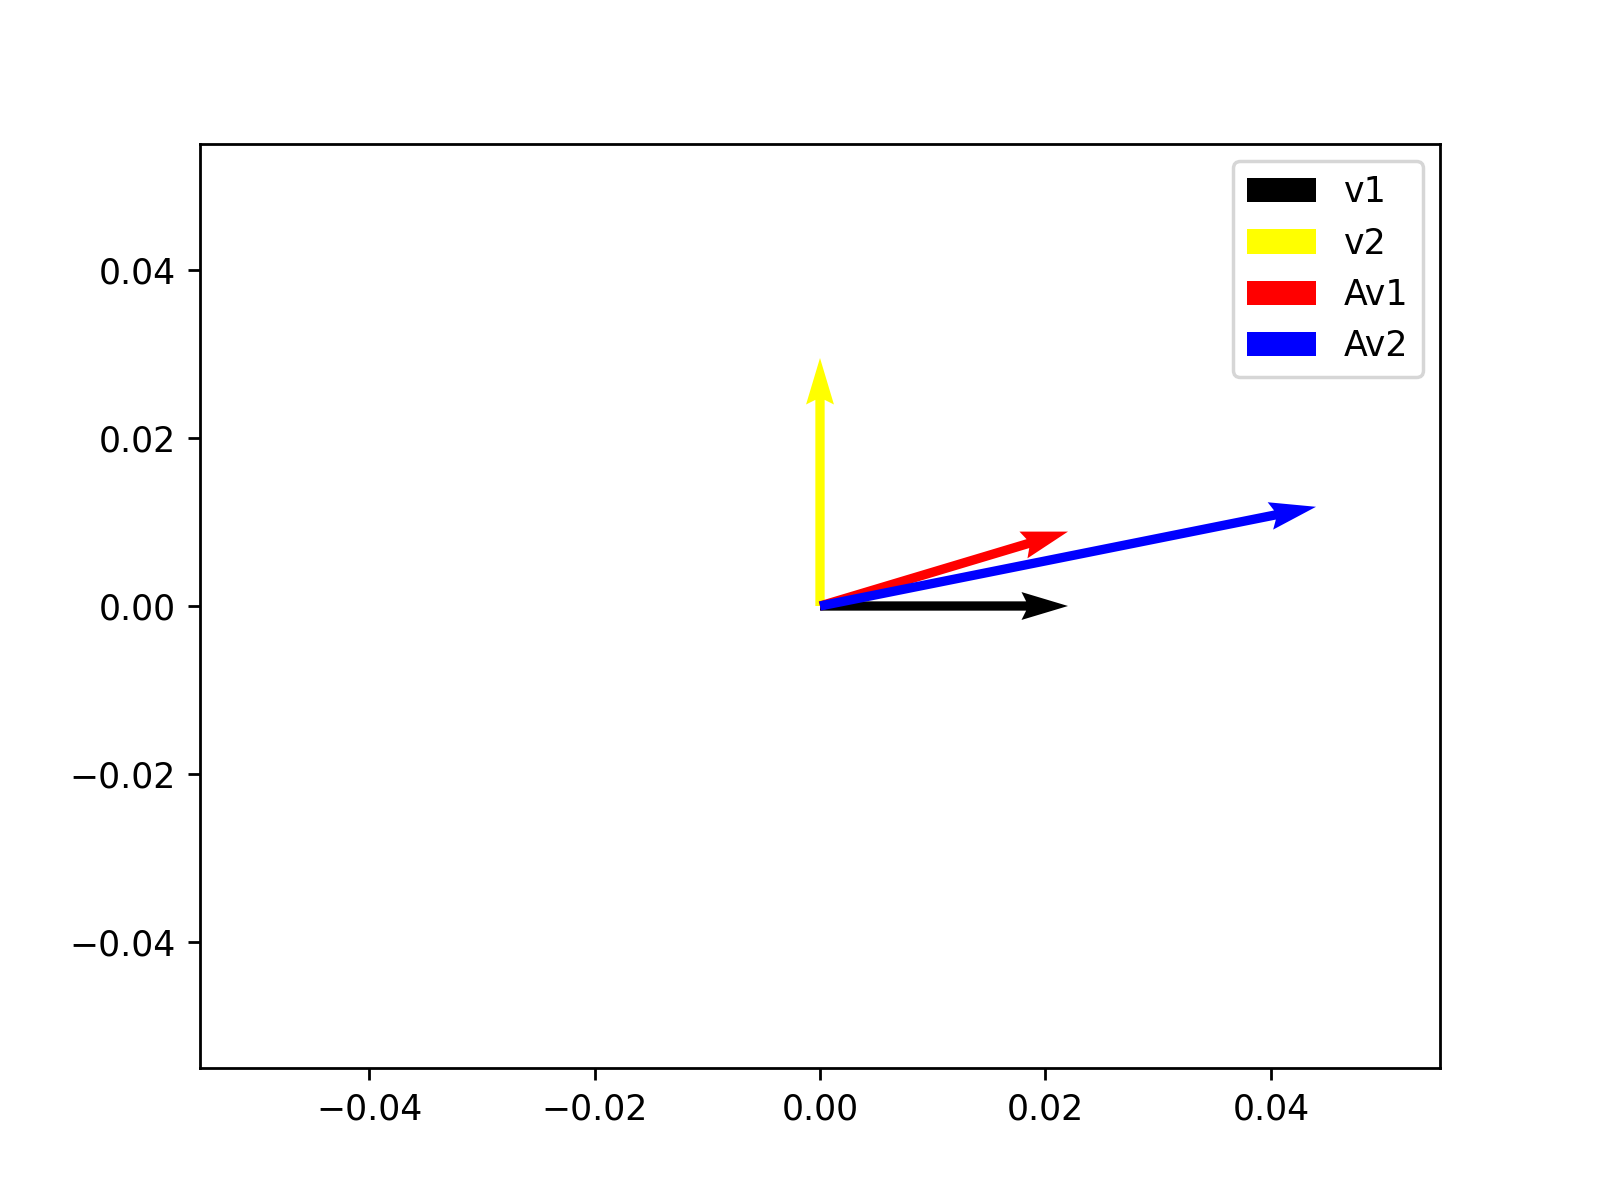

In [2]:
# Define v1
v1 = np.array([[1], [0]])
# Define v2
v2 = np.array([[0], [1]])
 
# Plot them using quiver. Both start at (0,0) (the origin). 
# Use black for v1 and yellow for v2
fig, ax = plt.subplots()
plt.quiver(0, 0, v1[0], v1[1], scale=5, color='black')
plt.quiver(0, 0, v2[0], v2[1], scale=5, color='yellow')

Then apply $A$ to both vectors, e.g., $w_1 = A v_1$ and $w_2 = A v_2$, and plot these.

<IPython.core.display.Javascript object>


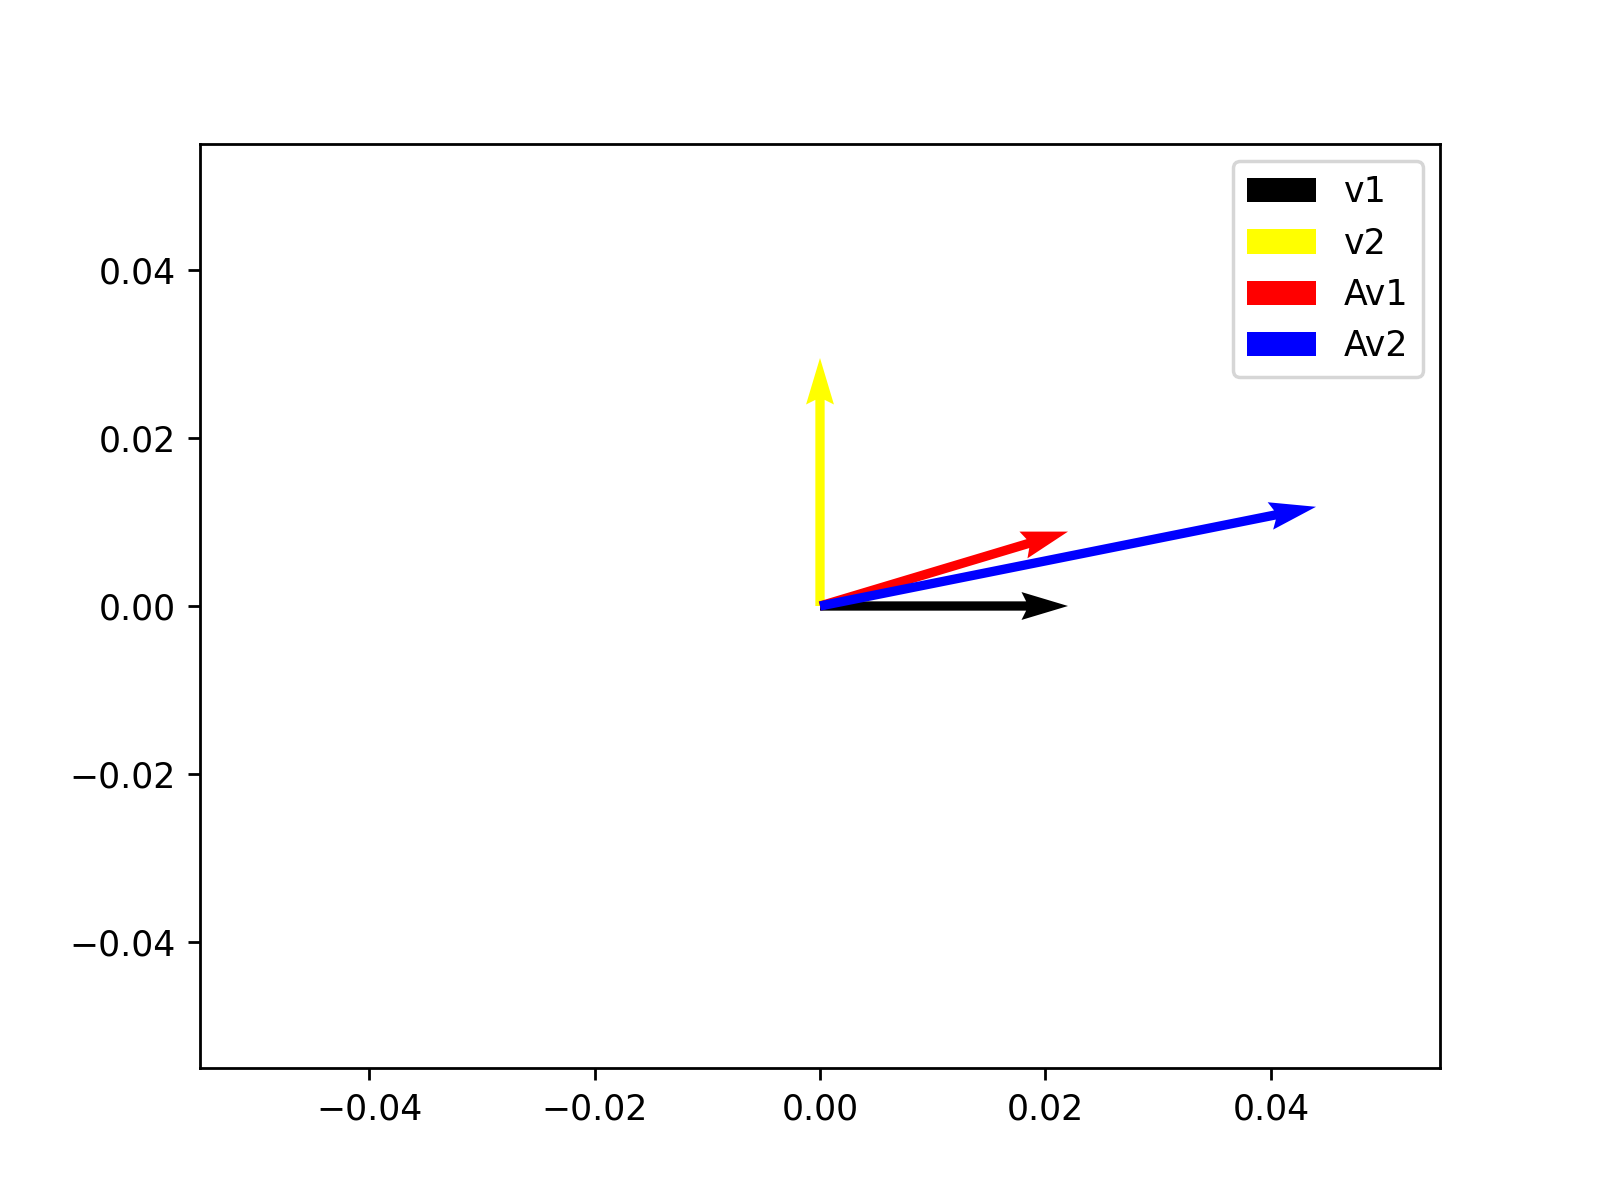

In [3]:
# Define A
A = np.array([[1, 2], [0.3, .4]])
# Define w1
w1 = A@v1
# Define w2
w2 = A@v2
 
# Plot both in red, using quiver
ax.quiver(0, 0, w1[0], w1[1], color='red', scale=5)
ax.quiver(0, 0, w2[0], w2[1], color='blue', scale=5)
 
ax.legend(["v1", "v2", "Av1", "Av2"])
fig

Every matrix will come with some *special directions* for which the stretch and rotation are special (in
some way!). We'll come back to this.

Okay, so we know that matrices rotate and stretch vectors. To understand this more, we are going to think about "what happens to a sphere (a circle in 2D) when we apply a circle to it. Well, that is the image we had above: 
<div>
<img src="SVD_diagram.png" alt="Matrices as a linear transformation" style="width: 200px;"/>
</div>
We see that a circle becomes an ellipse. This ellipse is defined by its semimajor and semiminor axis. Those are two vectors and form a new *basis.* **The semimajor and semiminor form a new coordinate system (because they are two orthogonal directions) that define the ellipse.** Let's call those two new unit vectors (unit vectors are vectors of length 1) $u_1$ and $u_2$. We see that they both don't have the same length, so the semiminor and semimajor axes are actually stretched versions of the unit vectors: $\sigma_1 u_1$ and $\sigma_2 u_2$. 

So let's think about what is happening: we started with one set of basis vectors: $v_1, v_2$ (the red and yellow clock hands in the image above). When we applied the matrix to it (matrix multiplication), we arrived at a new set of basis vectors, $u_1$ and $u_2$ that were stretched/shrunken by the factors $\sigma_1$ and $\sigma_2$ respectively.

In other words,
$$A v_1 = \sigma_1 u_1,$$
where $v_1$ and $u_1$ both have length 1 ($\|v_1\| = \|u_1\| = 1$). If we had $n$ vectors ($n$-dimensional space), we would have
$$A v_j = \sigma_j u_j, \qquad j = 1, \ldots, n.$$
In matrix-multiplication form, this looks like
$$ A \begin{pmatrix} v_1 & v_2 & \cdots & v_n \end{pmatrix} = \begin{pmatrix} u_1 & u_2 & \cdots & u_n \end{pmatrix} \begin{pmatrix} \sigma_1 & 0 & \cdots & 0 \\
0 & \sigma_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & \cdots & \cdots & \sigma_n
\end{pmatrix},
$$
where the matrices with $v_j$ and those with $u_j$ are comprised of the columns $v_j, ~u_j$ side by side. For example, in two dimensions it is
$$
\begin{pmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{pmatrix}\begin{pmatrix} v_{11} & v_{12} \\ v_{21} & v_{22} \end{pmatrix} = \begin{pmatrix} u_{11} & u_{12} \\ u_{21} & u_{22}\end{pmatrix}\begin{pmatrix} \sigma_1 & 0 \\ 0 & \sigma_2 \end{pmatrix},
$$
assuming that $v_j = \begin{pmatrix} v_{1j} & v_{2j} \end{pmatrix}^T$, and $u_j$ is defined similarly. We write this matrix-matrix product as
$$ A V =  U  \Sigma,$$
which defines the matrices $V, ~U,$ and $\Sigma$. Again what we are doing is going from one *basis* ($v_1$ and $v_2$) to another *basis* ($u_1$ and $u_2$). The $U$ and $V$ matrices are like rotation matrices and the $\Sigma$ is the stretching matrix. It happens to be that we can rewrite this as $A =  U \Sigma V^T$. Again, what do matrices do? Rotate and stretch. So what does the matrix $A$ do? It first rotates ($V^T$), then stretches $(\Sigma)$ and then rotates again $( U)$. 

The main reason why we are interested in doing this is because calculating *the SVD of a matrix* (meaning the three matrices, $U,~ \Sigma$ and $V$), *allows us to find the natural coordinate system for the system*. 

Let's see an example of how we do this on the computer. We have $A$ defined. 

In [4]:
# Print A to remind us what it is.
print(A)
# Calculate SVD with np.linalg.svd(A). Print the result.
print(np.linalg.svd(A))

[[1.  2. ]
 [0.3 0.4]]
(array([[-0.97657551, -0.21517498],
       [-0.21517498,  0.97657551]]), array([2.28962221, 0.08735066]), array([[-0.45471607, -0.89063646],
       [ 0.89063646, -0.45471607]]))


We can see that it is outputting 3 things. Those are $U$, $\Sigma$ and $V^T$ (note that it is $V^T$ not $V$!). Let's define those.

In [5]:
# Save the three outputs: U, S, and Vt from np.linalg.svd(A)
U, S, Vt = np.linalg.svd(A)

#Print each of them
print(U)
print(S)
print(Vt)

[[-0.97657551 -0.21517498]
 [-0.21517498  0.97657551]]
[2.28962221 0.08735066]
[[-0.45471607 -0.89063646]
 [ 0.89063646 -0.45471607]]


We see that $U$ and $Vt$ are matrices as expected, but not $S$! That's because it only gives us the diagonal. To turn it into a matrix we can use `np.diag`. 

In [6]:
# Set S = np.diag(S)
S = np.diag(S)
print(S) # now it is a matrix

[[2.28962221 0.        ]
 [0.         0.08735066]]


By the way let's check: Is $A =  U \Sigma V^T$?

In [7]:
# Print A
print(A)
# Print the product of the three matrices.
print(U@S@Vt)

[[1.  2. ]
 [0.3 0.4]]
[[1.  2. ]
 [0.3 0.4]]


Good, we see they are the same. We were saying that the vectors in $U$ and $V^T$ were *basis* vectors. In order for that to be true, they need to have length 1 and be orthogonal. We should check the *columns* of $U$ and the *rows* of $V^T$ (or the columns of $V$). Let's plot them.

<IPython.core.display.Javascript object>


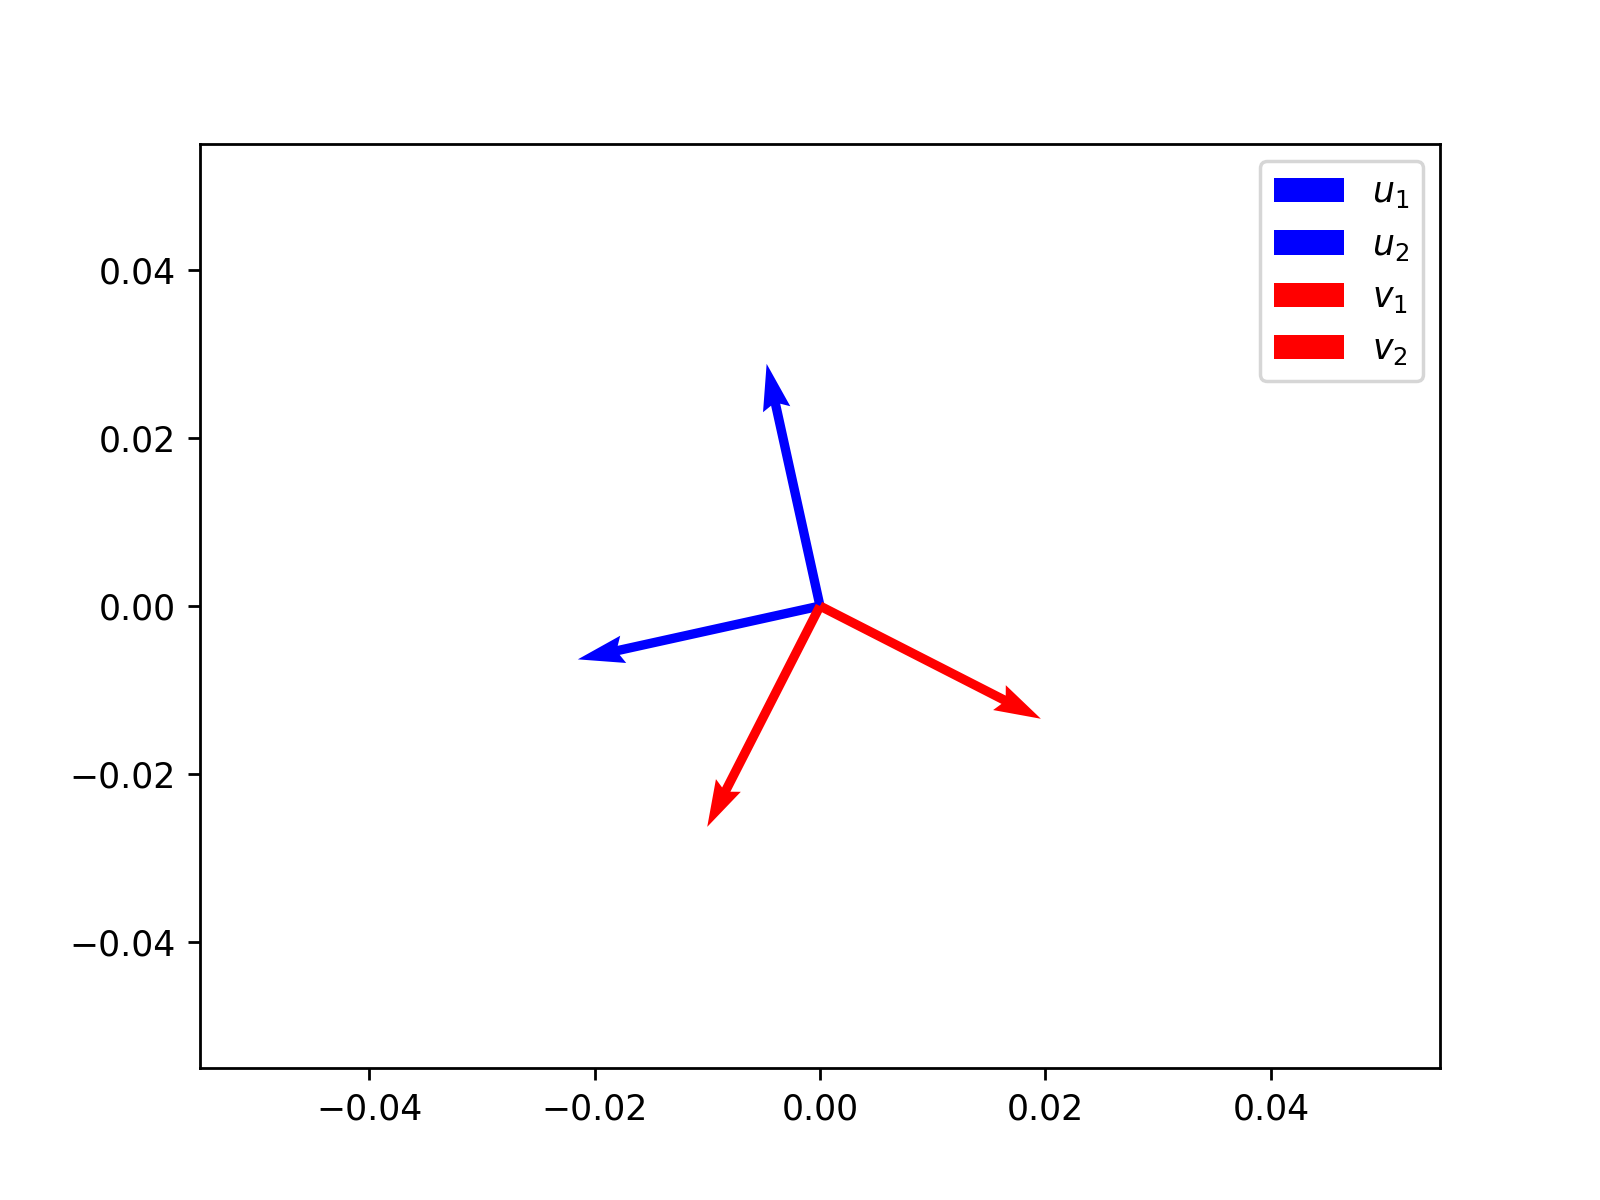

In [8]:
# Create a new figure
fig, ax = plt.subplots()
# Plot the two columns of U in blue, using quiver
# We are plotting the 0th column ([:, 0]),
# but the x component is the 0th entry in the 0th column
# and the y component is the 1st entry in the 0th column
ax.quiver(0, 0, U[0, 0], U[1, 0], color='blue', scale=5,
                 label = '$u_1$') 

# Same now for the 1st column. 
ax.quiver(0, 0, U[0, 1], U[1, 1], color='blue', scale=5,
         label = '$u_2$')

# Show legends
ax.legend()

We can see that those are orthogonal and have the same length. Now let's do the same for the *rows* of $V^T$. Plot in red.

<IPython.core.display.Javascript object>


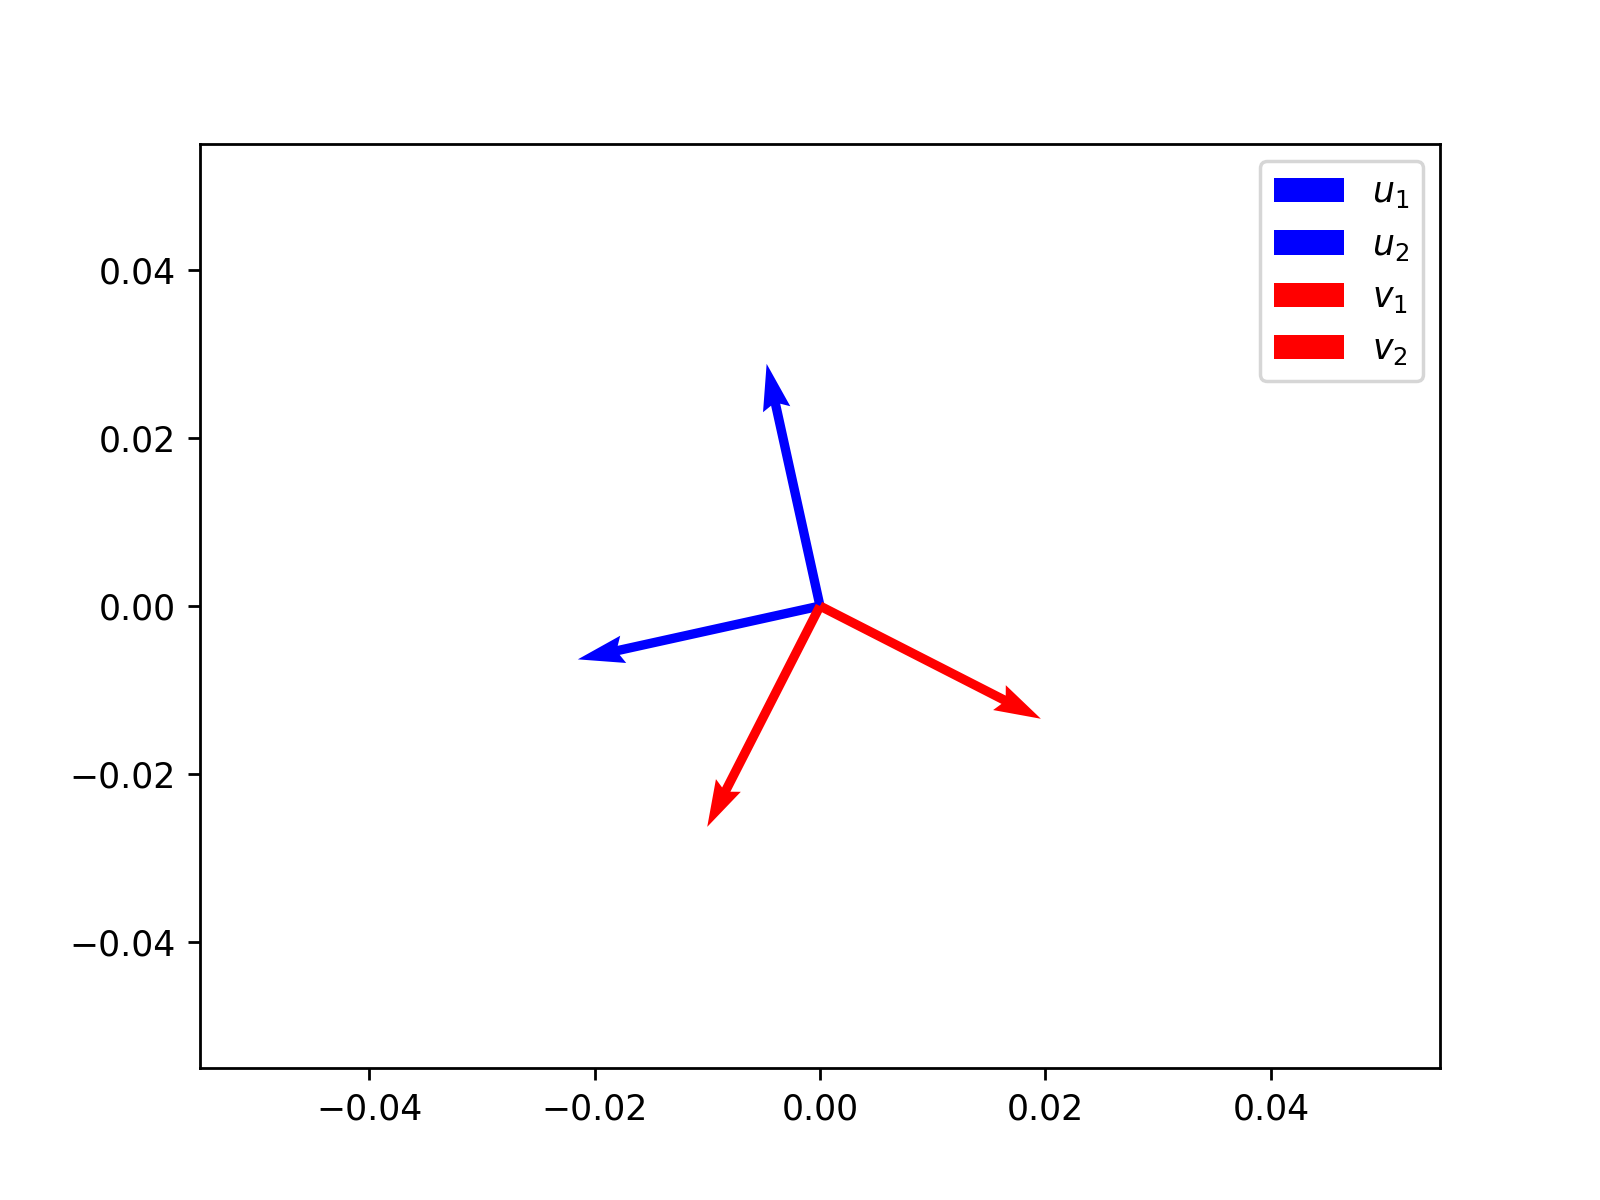

In [9]:
# Plot the two rows of V^T in red, using quiver
# We are plotting the 0th row ([0, :]),
# but the x component is the 0th entry in the 0th row
# and the y component is the 1st entry in the 0th row
ax.quiver(0, 0, Vt[0, 0], Vt[0, 1], color='red', scale=5,
         label = '$v_1$') 

# Same now for the 1st row. 
ax.quiver(0, 0, Vt[1, 0], Vt[1, 1], color='red', scale=5,
         label = '$v_2$')

# Show the legend
ax.legend()

# Show the figure
fig

We have verified that there are two different bases, in $U$ and $V$. The matrix $A$ rotates between the two bases. 

The columns of $U$ are called the "*left-singular vectors*" and the columns of $V$ (or rows of $V^T$) are called the "*right-singular vectors.*" $\Sigma$ contains the "*singular values.*"

So how does this all relate to the movie recommendation algorithm?

When we can draw arrows in 2D, as we have done above, it's easy to say what the directions are because we can visualize them. When we have other data sets, like the scores for movies for a bunch of students in class, we can't do that so easily. First off, our data set is going to be huge: hundreds of dimensions (hundreds of students) or tens of dimensions (tens of movies). We can't visualize that. Luckily, we can still interpret what the result is. 

For now we are going to not worry about the $\Sigma$ matrix. So we are going to work with $$A = U \Sigma V^T = \tilde U V^T,$$ where $A$ is our data matrix, and $\tilde U = U \Sigma$ is a scaled version (scaled by the singular values) of our left-singular vectors. Remember this doesn't change the coordinate system, it just stretches the vectors.

So we have
$$
A = \begin{bmatrix} | & | & \cdots & | \\ \tilde u_1 & \tilde u_2 & \cdots & \tilde u_n \\
| & | & \cdots & |\end{bmatrix} \begin{bmatrix}\rule{1em}{1pt} &  v_1^T & \rule{1em}{1pt} \\ \rule{1em}{1pt} &  v_2^T & \rule{1em}{1pt} \\ & \vdots & \\ \rule{1em}{1pt} &  v_n^T & \rule{1em}{1pt}\end{bmatrix}.
$$
Notice that we have $\tilde U$ having the columns and $V^T$ having the rows. Compare this to our data matrix, $A$, 
$$
A = \begin{pmatrix}
3 & 4 & 2 & 1 \\
5 & 1 & 3 & 1\\
1 & 1 & 2 & 4\\
3 & 3 & 3 & 3\\
2 & 1 & 4 & 4
\end{pmatrix},
$$
where the rows are people's scores and the columns are movie ratings. So **the left-singular vectors**, which are columns, **form a basis for the movies** and **the right-singular vectors**, which are rows, **form a basis for the people.**

So for example, we might find that
$$ 
\begin{align*}
\tilde u_1 &= \text{a typical action movie}\\
\tilde u_2 &= \text{a typical comedy movie}\\
\tilde u_3 &= \text{a typical horror movie}\\
\tilde u_4 &= \text{a typical anime movie}\\
&\vdots
\end{align*},
$$
etc. So just like before when I wrote, 
$$
\begin{pmatrix} 6 \\ 4 \end{pmatrix} = 6 \begin{pmatrix} 1 \\0 \end{pmatrix} + 4 \begin{pmatrix} 0 \\ 1 \end{pmatrix},
$$
writing the vector as a sum of its two basis elements, now we can have something like
$$ \text{The Batman} = \alpha_1 \tilde u_1 + \alpha_2 \tilde u_2 + \ldots,$$
where $\alpha_1$ tells me "*how much of an action movie The Batman is*, $\alpha_2$ tells me "*how much of a comedy movie The Batman is*", etc. Then *every single movie will be some combination of those different types.* Now we don't actually get to choose those genres/basis. Instead, if we plug in $4$ movies, the SVD will find a 4-dimensional basis for us: it will find 4 characteristics. If we plug in 1000 movies it will find a $1000$-dimensional basis: 1000 characteristics. We won't be able to actually say in words what those characteristics are, that's what SVD does on its own and it's hard to interpret what the basis elements are, but what it's doing is *finding some interrelatedness between movies*, based on how they were rated by people. For example, it could actually be that one of the basis elements is *year the movie came out* because certain groups of people may rank movies similarly based on the year, or *whether or not the movie had Leonardo Dicaprio in it*, etc. **We don't know what that basis is.**

What about the right-singular vectors? Well, they provide a basis for our other space: people. For example, we may have something like
$$
\begin{align*}
v_1 &= \text{ typical action fan}\\
v_2 &= \text{ typical comedy fan}\\
v_3 &= \text{ typical horror fan}\\
v_4 &= \text{ typical anime fan}\\
& \vdots
\end{align*}
$$


etc. So now we have something like


$$
A = \tilde U V^T = \begin{bmatrix} | & | & \cdots & \\
\text{action movie} & \text{comedy movie} & \cdots & \\ | & | & \cdots & \end{bmatrix} \begin{bmatrix} \rule{1em}{1pt} & \text{action fan} & \rule{1em}{1pt}\\
\rule{1em}{1pt} & \text{comedy fan} & \rule{1em}{1pt} \\ 
\vdots & \vdots & \vdots \end{bmatrix}
$$


So if we want to know Adnan's score for "The Batman", which is $A(1,1)$ we do
$$
\begin{align*}
A(1,1) &= \text{Adnan's score for "The Batman"}\\
&= (\text{How much of an action movie is The Batman})\\
&\qquad \qquad \cdot(\text{How much does Adnan like action movies}) \\
& \qquad + (\text{How much of a comedy movie is The Batman})\\
& \qquad \qquad \cdot(\text{How much does Adnan like comedy movies}) + \ldots
\end{align*}
$$
etc.

In other words, to figure out someone's score in the movie, we just have to know how much of each component in the basis a particular movie is and then weight it by how much that person likes movies in that basis. 

The SVD allows us to do this **when the coordinate basis is not obvious** and in fact finds **ideal coordinate bases for us.**

This allows us to now think about "what are the most important characteristics of a movie, in order for it to be ranked a particular way?" That's where the singular values come in, we'll get back to that next week!